# Busqueda de relaciones de valores faltantes

In [194]:
%run precarga_datos_librerias.py
%run scripts/pandas_missing_extension.py

Probando la extension
      a    b
0     a  0.0
1     s  1.0
2  None  2.0
3  None  3.0
4  None  4.0
5     s  5.0
6     d  NaN
7     a  7.0
8     f  8.0
9     a  9.0
     Type  Streak
0      NA       2
1  Not NA       3
2  Not NA       5


/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:169: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_ext

## Matriz de sombras (shadow matrix)

Permite saber si ciertos valores faltantes presentes en una variable están correlacionados a los valores faltantes en otro.

1. Identifica todos tus valores faltantes. (Tabla original)
2. Reemplaza los valores faltantes con True (1) y False (1). (Matriz de sombras)
3. Reemplazar los True y False por algo más informativo. Añade el subfijo a los nombres de tus variables. (Nabular)

## Concepto y aplicación de la matriz de sombras.

### Construcción de la matriz de sombras

In [195]:
( # Matriz de sombras
    riskfactors
    .isna()
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [196]:
( # Nabular
    riskfactors
    .isna()
    .replace({
        False: "Not_missing",
        True: "Missing",
    })
    .add_suffix("_NA") # Añade subfijo a cada columna
    .pipe(
        lambda nabular: pd.concat(
            [riskfactors, nabular],
            axis="columns"
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not_missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not_missing,Not_missing,Not_missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not_missing,Not_missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not_missing,Not_missing,Not_missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing


### Automatizar con la API de pandas.

In [197]:
riskfactors.missing.bind_shadow_matrix()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not_NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not_NA,Not_NA,Not_NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not_NA,Not_NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not_NA,Not_NA,Not_NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA


### Explorar estadísticos usando las nuevas columnas de la matriz de sombras.

In [198]:
# Comparando los estadísticos de la variable edad dividida por 
# la perdida o no del valor weight_lbs_NA
( 
    riskfactors
    .missing.bind_shadow_matrix()
    .groupby(["weight_lbs_NA"])
    ["age"]
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
weight_lbs_NA,,,,,,,,
NA,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
Not_NA,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


Quizas, o quizas no, la diferencia sea significativa entre ambos valores, depende de pruebas estadísticas, sin embargo es a partir de aquí que ya se puede empezar a hacer preguntas entre variables del grupo del que se tienen observaciones, que del grupo del que no se tienen observaciones.

Sería posible, por ejemplo, que no se registrara el peso de personas de cierta edad.

## Visualización de la matriz de sombras.

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

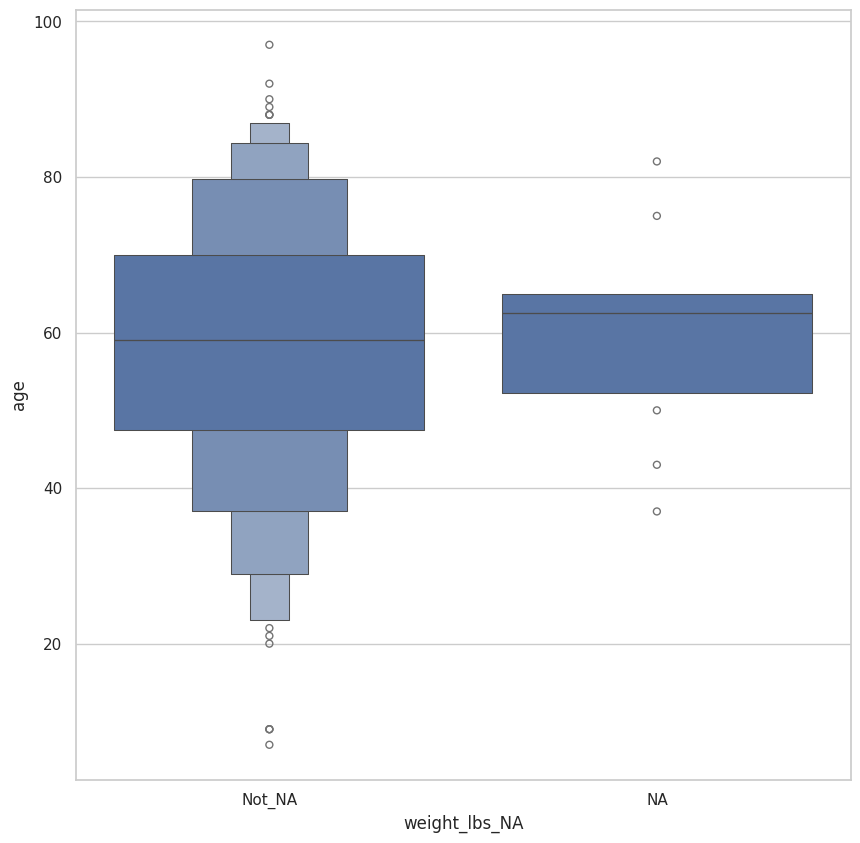

In [199]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x="weight_lbs_NA",
                y="age"
            )
        )
    )
)

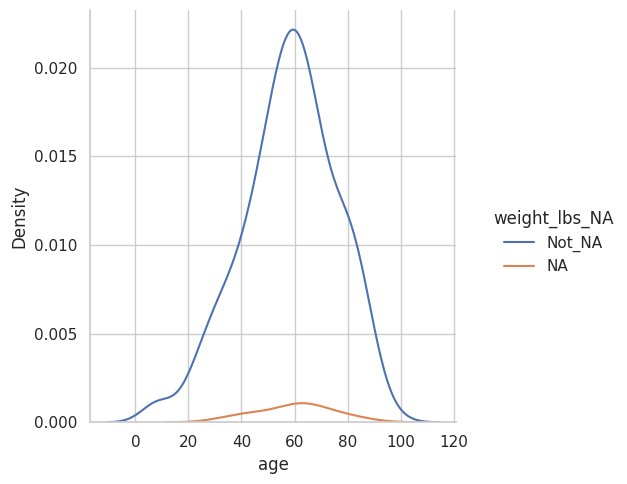

In [200]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                hue="weight_lbs_NA",
                kind="kde"
            )
        )
    )
)

Distribución de densidad de los pesos, se observa la repetición de valores NA justo donde hay más registro de valores en primer lugar.

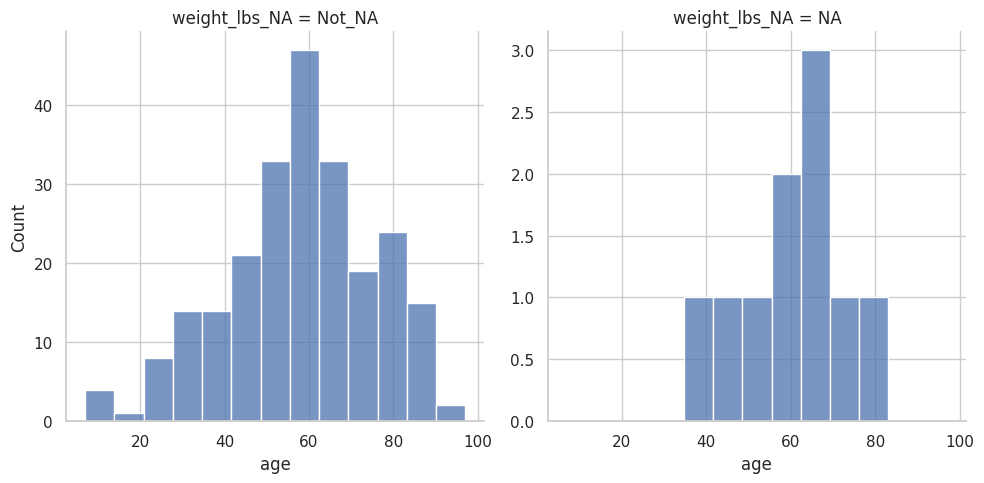

In [201]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="weight_lbs_NA",
                facet_kws={
                    "sharey": False
                }
            )
        )
    )
)

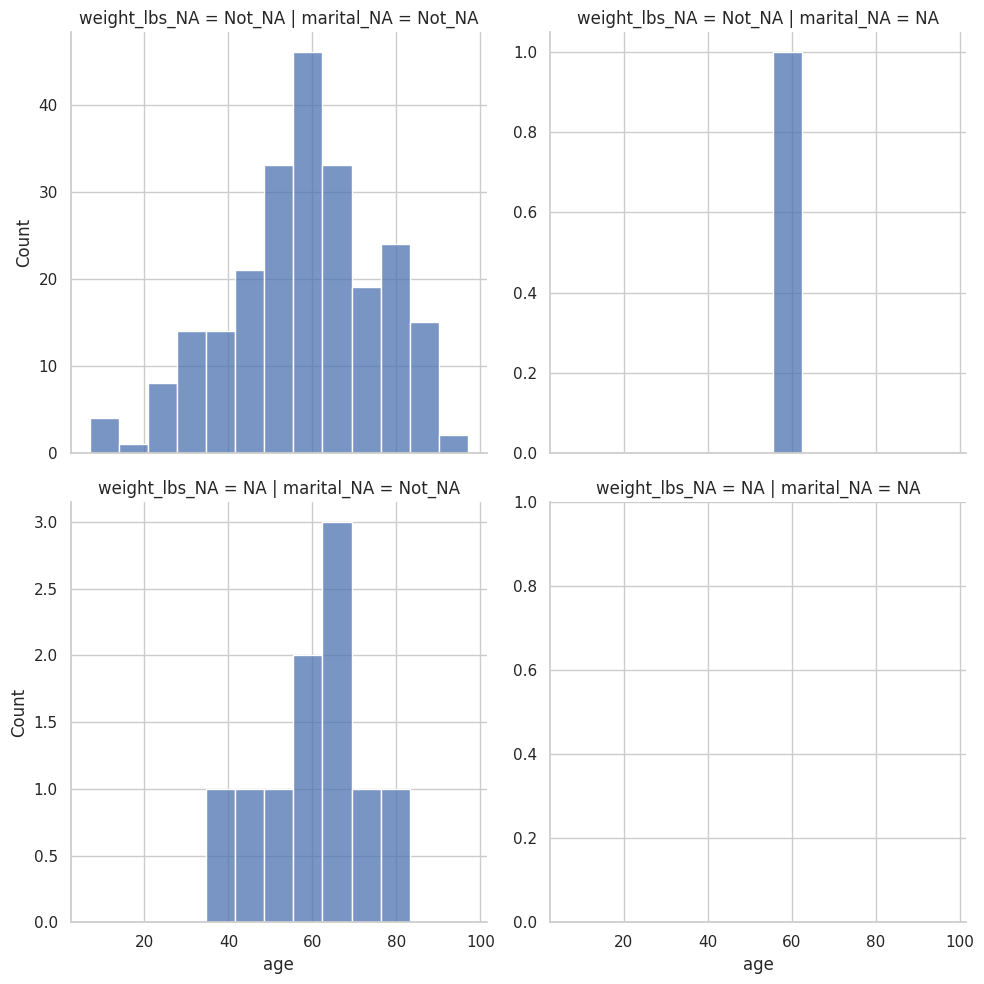

In [202]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="marital_NA",
                row="weight_lbs_NA",
                facet_kws={
                    "sharey": False
                }
            )
        )
    )
)

No existen edades para los casos en los que nosotros tenemos casos faltantes de peso y edad.

## Visualización de valores faltantes en 2 variables.

Tiene la intención de agruparlos a su variabilidad.

La siguiente función reemplaza los valores por dummy que indican si son faltantes o no.

In [203]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_bellow: float=0.10,
    jitter: float=0.075,
    seed: int=42
) -> pd.Series:
    column = column.copy(deep=True)
    
    # Extraer metadatos del valor
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift de los datos
    column_shift = column.min() - column.min()*proportion_bellow

    # Crear el jitter noise al rededor de los puntos
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Guardar conjunto de datos en nueva variable
    column[missing_mask] = column_shift + column_jitter
    
    return column


<Axes: xlabel='weight_lbs', ylabel='height_inch'>

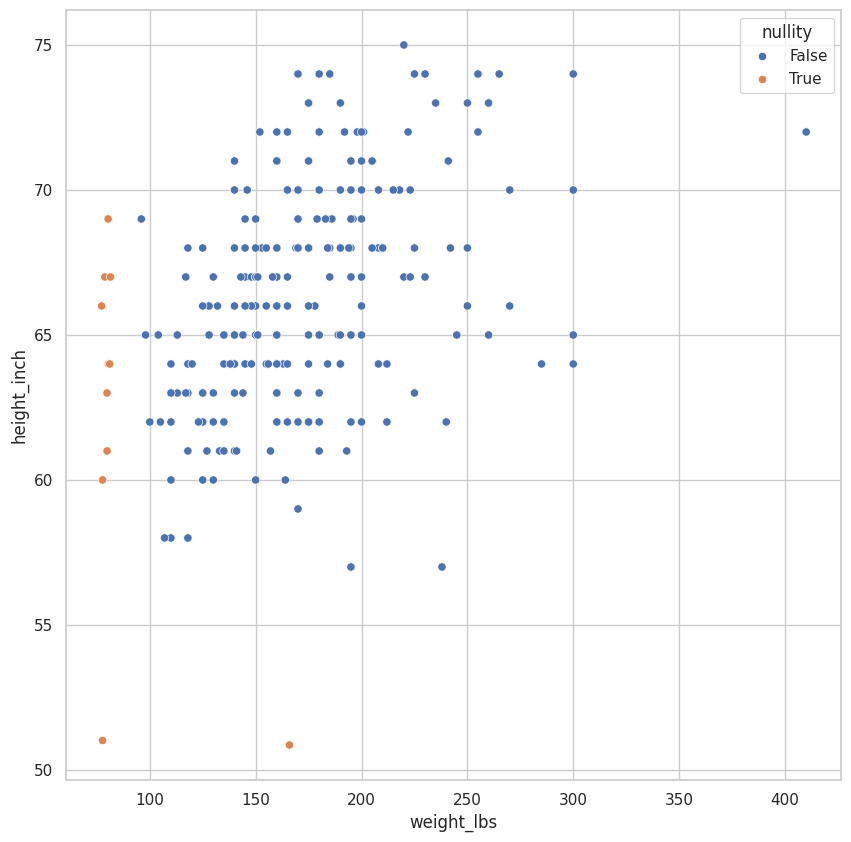

In [204]:
(
    riskfactors
    .select_dtypes(
        exclude="category"
    )
    .pipe(
        # Se atrae columnas con valores faltantes
        lambda data : data[data.columns[data.isna().any()]]
    )
    .missing.bind_shadow_matrix(
        false_NA_value = False,
        true_NA_value = True
    )
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, jitter=0.015)
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data = df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity"
            )
        )
    )
)

In [216]:
riskfactors.select_dtypes(exclude="category").missing.variable_summary()

,variable,n_cases,n_na,n_not_na,na_proportion,na_percentage
0,age,245,0,245,0.000000,0.000000
1,weight_lbs,245,10,235,0.040816,4.081633
2,height_inch,245,2,243,0.008163,0.816327
3,bmi,245,11,234,0.044898,4.489796
4,children,245,0,245,0.000000,0.000000
5,health_physical,245,0,245,0.000000,0.000000
6,health_mental,245,0,245,0.000000,0.000000
7,health_poor,245,113,132,0.461224,46.122449
8,drink_days,245,134,111,0.546939,54.693878
9,drink_average,245,135,110,0.551020,55.102041


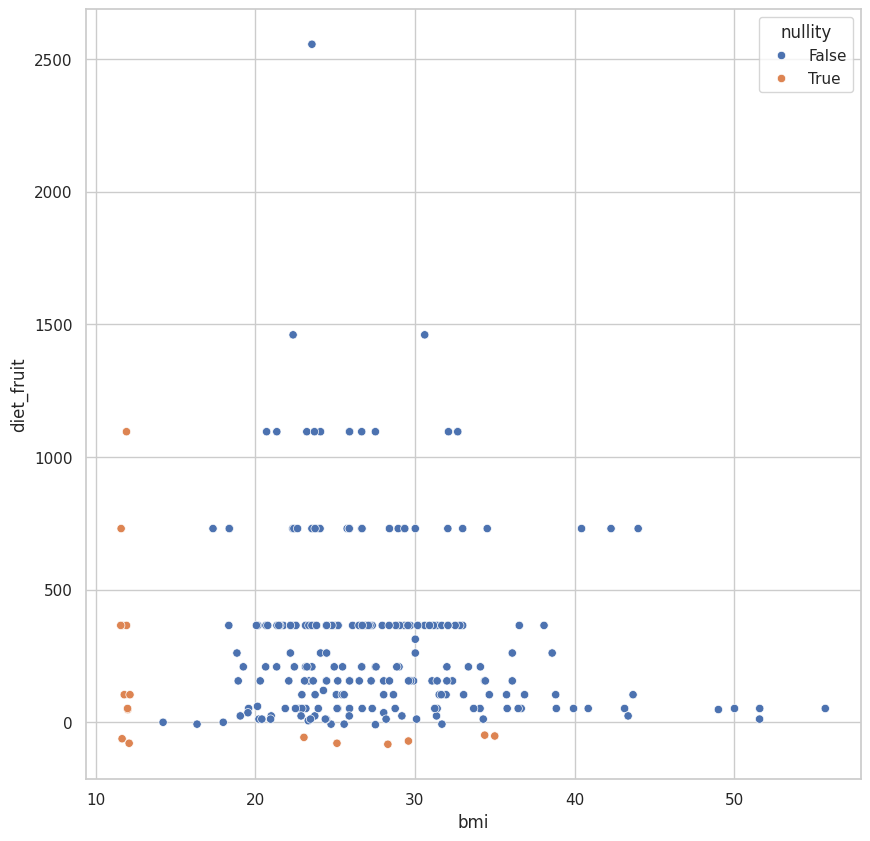

In [217]:
riskfactors.missing.na_scatterplot("bmi", "diet_fruit")

El gráfico anterior muestra el peso (x) y la alura (y). Los puntos azules representan los datos completos, los naranjas son puntos para sólo uno de los 2 parámetros.

Podemos ver que los puntos de los valores faltantes están en un intervalo conocido.

## Correlación de nulidad.

¿Existen valores faltantes que aparecen conjuntamente con otras variables en el conjunto de datos?

<Axes: >

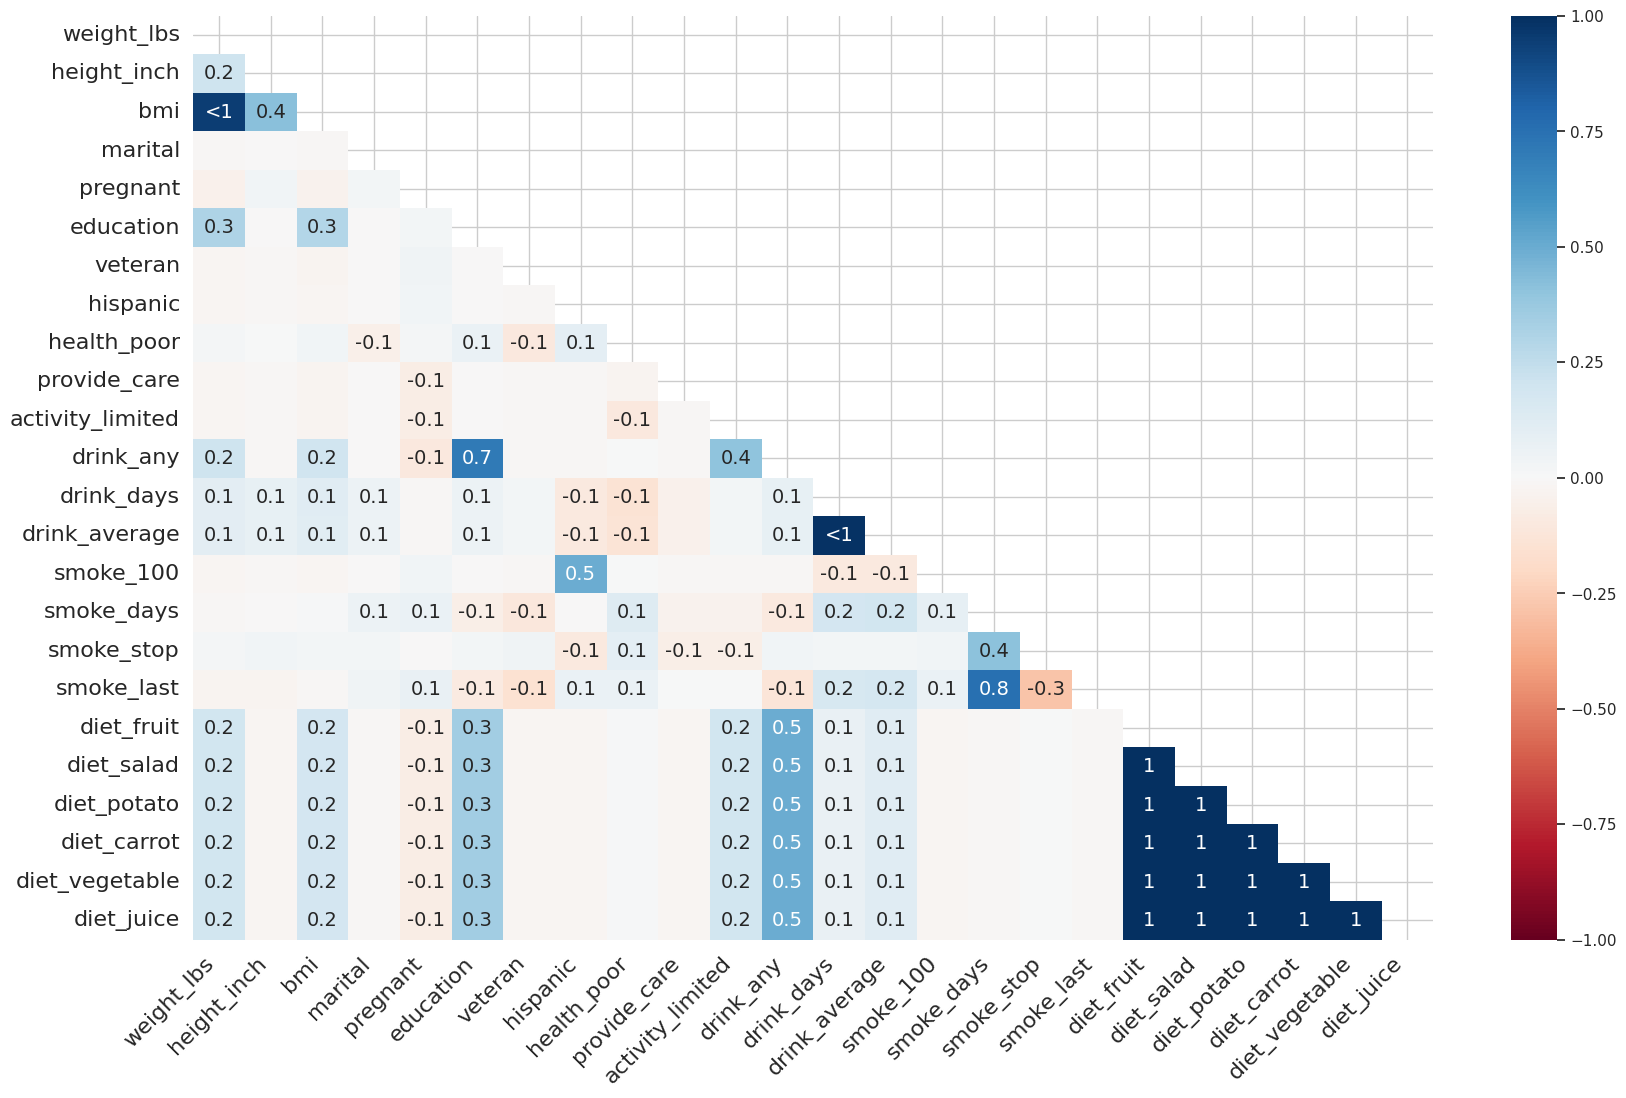

In [218]:
missingno.heatmap(
    df=riskfactors
)

Lo anterior muestra la correlación de Pearson de falta de valores entre dos variables cualquiera.

Las correlaciones negativas pueden estar presente (existen casos mutuamente excluyentes)

Por ejemplo, diet_juice y diet_carrot, cuando no tenemos la una, tampoco tenemos la otra.

### Dendrograma

<Axes: >

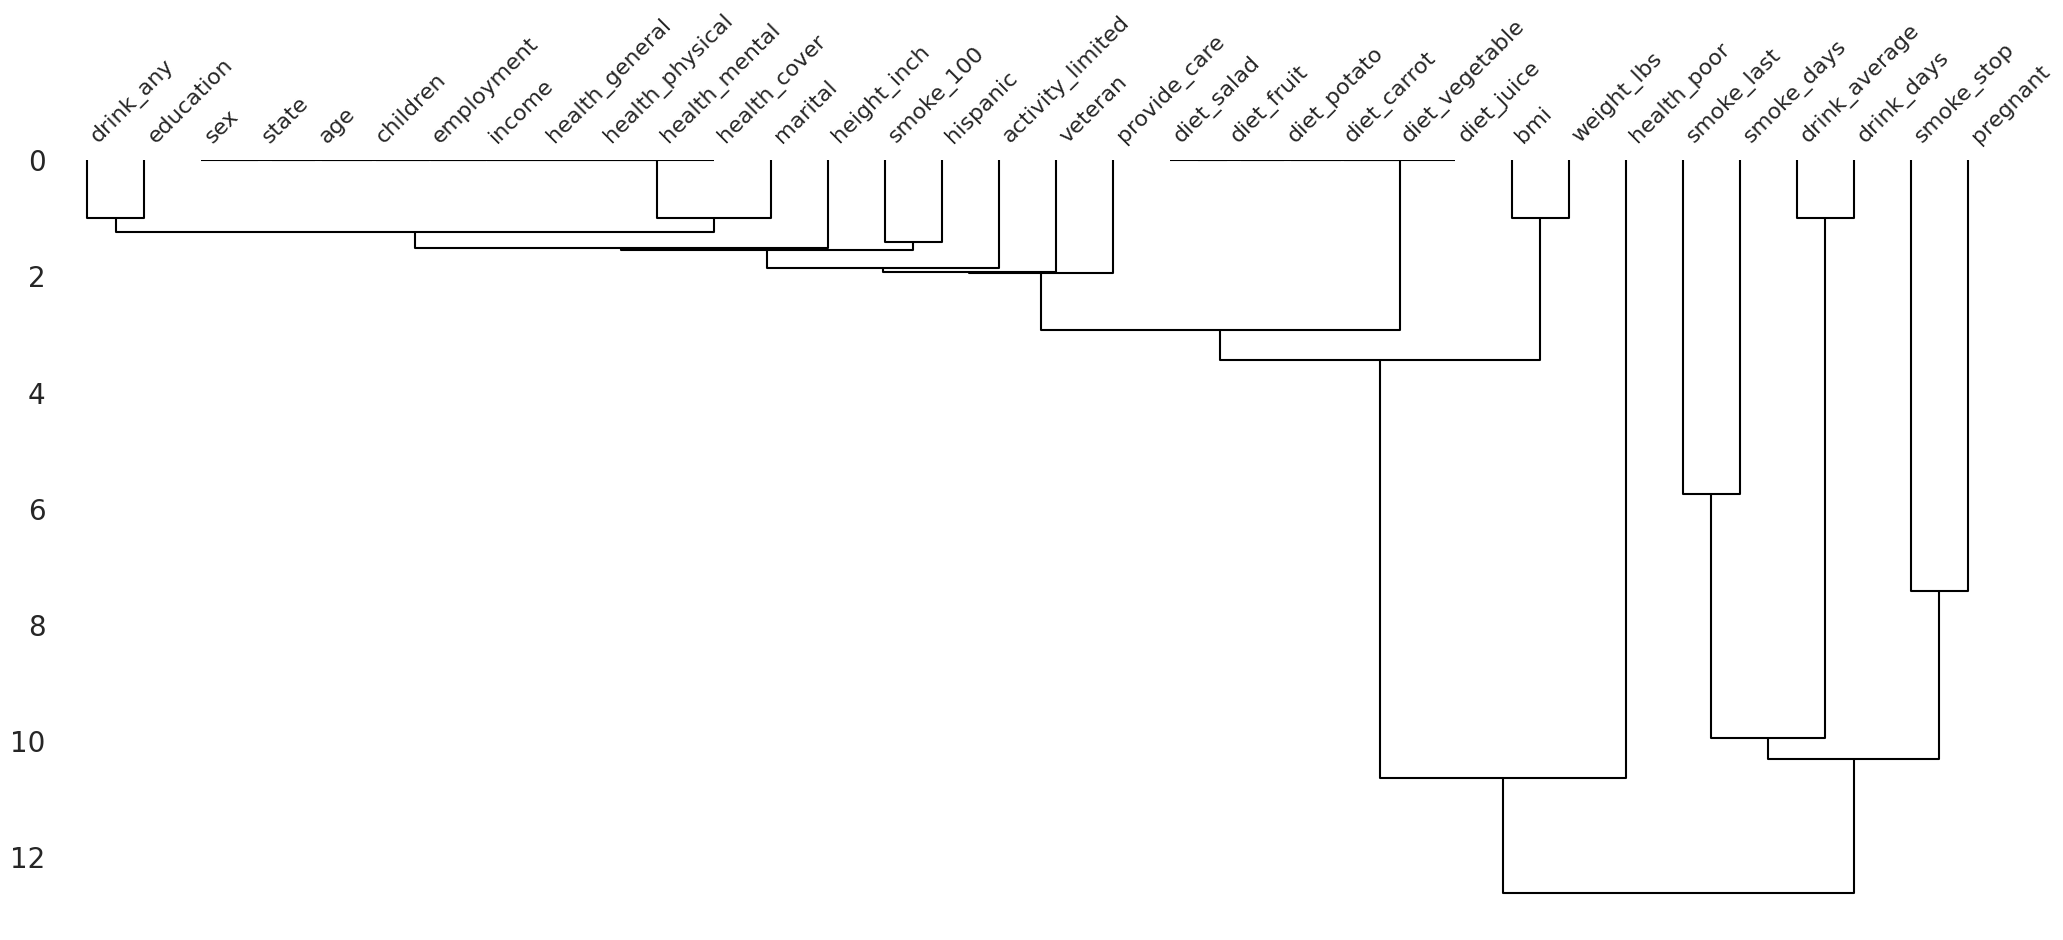

In [225]:
missingno.dendrogram(
    df = riskfactors
)

En el diagrama anterior, dos variables agrupadas cerca del nivel base, significa que la presencia de valores faltantes es muy similar uno con otro.